# Topic            : Stock Market Prediction using Numerical and Textual Analysis
## Task                :  7

## Level               : Advanced
## Submitted by : Mohd Tarique Khan
## Date                : 07/08/2021

# Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 
# Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
# Data used:  for historical stock prices from finance.yahoo.com
# Data used:  for textual (news) data from https://bit.ly/36fFPI6


In [1]:
# Import Liabraries

# To ignore warnings during the session
import warnings
warnings.filterwarnings('ignore') 

# Importing essential liabraries
import pandas as pd
import numpy as np
import math

# Importing Data Visualization Liabraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Downloading Historical Stock Prices from Yahoo Finance

In [2]:
# Importing required libraries
import time
import datetime

In [3]:
# Creating Variables, we can create data file for many companies but here i will take Microsoft only for assessment 
# # tickers = ['MSFT', 'GOOG', 'AAPL', RELIANCE.NS] # For downloading Multiple Companies data from Yahoo Finance
tickers = ['RELIANCE.NS']
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016,8,10,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2020,12,31,23,59).timetuple()))
print(period1)
print(period2)

1470862740
1609448340


In [4]:
xlwriter = pd.ExcelWriter('Historical_Stock_Prices.xlsx', engine='openpyxl')

for ticker in tickers:
    query_string =f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
#                   https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true
    df = pd.read_csv(query_string)
    df.to_excel(xlwriter, sheet_name=ticker, index=False)
    

# xlwriter.save() # For saving an excel file
df.to_csv('Historical_Stock_Prices_csv.csv', index=False) # For saving a csv file

In [5]:
# reading the datasets into pandas

stock_price = pd.read_csv('C:/Users/IT/TSF GRIP/TSF-GRIP-DSBA-Internship/Historical_Stock_Prices_csv.csv')

In [6]:
stock_price.head()

Date        Open        High         Low       Close   Adj Close  \
0  2016-08-11  496.270844  506.622711  495.106873  502.288818  489.428925   
1  2016-08-12  503.725189  516.553589  503.725189  513.036926  499.901855   
2  2016-08-16  513.259827  517.494690  502.982239  507.638092  494.641266   
3  2016-08-17  507.241852  509.569794  498.871185  501.892548  489.042816   
4  2016-08-18  503.229889  507.018982  503.229889  504.245270  491.335297   

      Volume  
0  6539201.0  
1  7552641.0  
2  6169134.0  
3  7147050.0  
4  3576481.0

# Loading already downloaded Times of India News Headlines from Harvard Dataverse

In [7]:
news_headlines = pd.read_csv('india-news-headlines.csv')

In [8]:
news_headlines.head()

publish_date headline_category  \
0      20010102           unknown   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic

In [9]:
news_headlines.tail()

publish_date                  headline_category  \
3424062      20201231                       city.jodhpur   
3424063      20201231                       city.udaipur   
3424064      20201231                         city.ajmer   
3424065      20201231                            removed   
3424066      20201231  entertainment.bengali.movies.news   

                                             headline_text  
3424062  Covid-19: Despite dip in cases; Rajasthan amon...  
3424063  Covid-19: Despite dip in cases; Rajasthan amon...  
3424064  Covid-19: Despite dip in cases; Rajasthan amon...  
3424065  Govt extends deadline for use of FASTag till F...  
3424066  Celebs plan to party safely and responsibly on...

# Data Visualization & Cleaning

In [10]:
# Stock Price Data

In [11]:
# checking for null values in both the datasets
stock_price.isna().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [12]:
news_headlines.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [13]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1083 non-null   object 
 1   Open       1081 non-null   float64
 2   High       1081 non-null   float64
 3   Low        1081 non-null   float64
 4   Close      1081 non-null   float64
 5   Adj Close  1081 non-null   float64
 6   Volume     1081 non-null   float64
dtypes: float64(6), object(1)
memory usage: 59.4+ KB


In [14]:
news_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [15]:
# coverting the "Date' column datatype from 'object' to 'datetime'
stock_price['Date'] = pd.to_datetime(stock_price['Date']).dt.normalize()

# filtering the important columns required
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

# setting column 'Date' as the index column
stock_price.set_index('Date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

Close         Open         High          Low      Volume
Date                                                                      
2016-08-11   502.288818   496.270844   506.622711   495.106873   6539201.0
2016-08-12   513.036926   503.725189   516.553589   503.725189   7552641.0
2016-08-16   507.638092   513.259827   517.494690   502.982239   6169134.0
2016-08-17   501.892548   507.241852   509.569794   498.871185   7147050.0
2016-08-18   504.245270   503.229889   507.018982   503.229889   3576481.0
...                 ...          ...          ...          ...         ...
2020-12-24  1994.150024  1947.000000  1998.800049  1945.900024   9588577.0
2020-12-28  2003.300049  2006.699951  2018.000000  1995.300049   7947719.0
2020-12-29  1990.050049  2009.000000  2012.300049  1982.550049   8589407.0
2020-12-30  1995.500000  1995.250000  2007.199951  1975.550049  10173132.0
2020-12-31  1985.300049  1993.500000  2011.900024  1978.599976   8667516.0

[1083 rows x 5 columns]

Text(0, 0.5, 'Price')

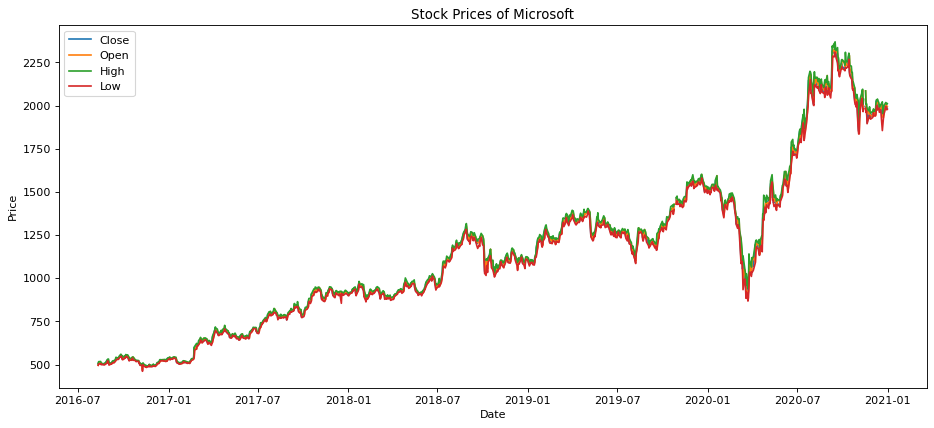

In [16]:
from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=80)
plt.plot(stock_price["Close"], label="Close")
plt.plot(stock_price["Open"], label="Open")
plt.plot(stock_price["High"], label="High")
plt.plot(stock_price["Low"], label="Low")

plt.legend()
plt.title("Stock Prices of Microsoft")
plt.xlabel("Date")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

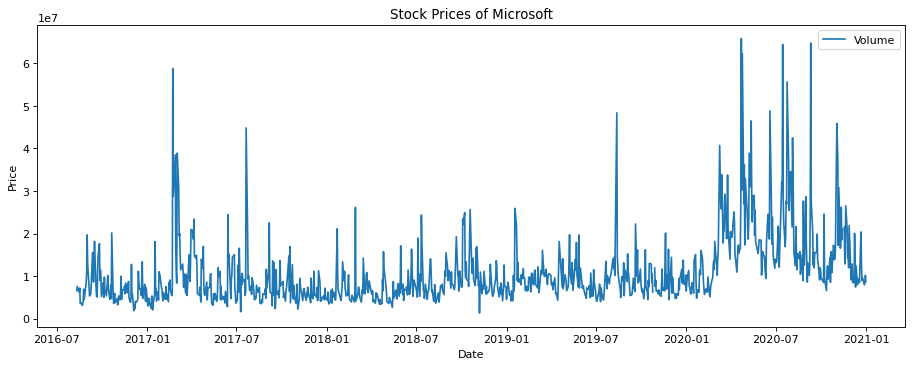

In [17]:
figure(figsize=(14, 5), dpi=80)
plt.plot(stock_price["Volume"], label="Volume")

plt.legend()
plt.title("Stock Prices of Microsoft")
plt.xlabel("Date")
plt.ylabel("Price")

# News Data

In [18]:
# coverting the "Date' column datatype from 'object' to 'datetime'
news_headlines['publish_date'] = news_headlines['publish_date'].astype(str)
news_headlines['publish_date'] = news_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
news_headlines['publish_date'] = pd.to_datetime(news_headlines['publish_date']).dt.normalize()

# filtering the important columns required
news_headlines = news_headlines.filter(['publish_date', 'headline_text'])

# grouping the news headlines according to 'Date'
news_headlines = news_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting column 'Date' as the index column
news_headlines.set_index('publish_date', inplace= True)

# sorting the data according to the index i.e 'Date'
news_headlines = news_headlines.sort_index(ascending=True, axis=0)
news_headlines

headline_text
publish_date                                                   
2001-01-02    Status quo will not be disturbed at Ayodhya; s...
2001-01-03    Powerless north India gropes in the dark,Think...
2001-01-04    The string that pulled Stephen Hawking to Indi...
2001-01-05    Light combat craft takes India into club class...
2001-01-06    Light combat craft takes India into club class...
...                                                         ...
2020-12-27    #BigInterview! Dhritiman Chatterjee: Nobody da...
2020-12-28    Horoscope Today; 28 December 2020: Check astro...
2020-12-29    Man recovers charred remains of 'thief' from h...
2020-12-30    Numerology Readings 30 December 2020: Predicti...
2020-12-31    Horoscope Today; 31 December 2020: Check astro...

[7262 rows x 1 columns]

# Concatenating(combining) both Stock Price and News data

In [19]:
# concatenating the datasets stock_price and news_headlines
concat_data = pd.concat([stock_price, news_headlines], axis=1)

# dropping the null values if any
concat_data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
concat_data

Close         Open         High          Low      Volume  \
2016-08-11   502.288818   496.270844   506.622711   495.106873   6539201.0   
2016-08-12   513.036926   503.725189   516.553589   503.725189   7552641.0   
2016-08-16   507.638092   513.259827   517.494690   502.982239   6169134.0   
2016-08-17   501.892548   507.241852   509.569794   498.871185   7147050.0   
2016-08-18   504.245270   503.229889   507.018982   503.229889   3576481.0   
...                 ...          ...          ...          ...         ...   
2020-12-24  1994.150024  1947.000000  1998.800049  1945.900024   9588577.0   
2020-12-28  2003.300049  2006.699951  2018.000000  1995.300049   7947719.0   
2020-12-29  1990.050049  2009.000000  2012.300049  1982.550049   8589407.0   
2020-12-30  1995.500000  1995.250000  2007.199951  1975.550049  10173132.0   
2020-12-31  1985.300049  1993.500000  2011.900024  1978.599976   8667516.0   

                                                headline_text  
2016-08-11  Watch: Pooja Hegde recreates Hrithik Roshan's ...  
2016-08-12  Bomb scare at west Delhi Metro station,Mobile ...  
2016-08-16  Gnocchi: The delightful dumplings,5 delicious ...  
2016-08-17  Vicky Kaushal: Lesser known facts,Withold 20% ...  
2016-08-18  Rakshabandhan Special: Bollywood brother-siste...  
...                                                       ...  
2020-12-24  How to set the mood for sex during cold winter...  
2020-12-28  Horoscope Today; 28 December 2020: Check astro...  
2020-12-29  Man recovers charred remains of 'thief' from h...  
2020-12-30  Numerology Readings 30 December 2020: Predicti...  
2020-12-31  Horoscope Today; 31 December 2020: Check astro...  

[1081 rows x 6 columns]

# Adding Columns for Sentiment scoring

In [20]:
# adding columns to concat_data
concat_data['Compound'] = ''
concat_data['Negative'] = ''
concat_data['Neutral'] = ''
concat_data['Positive'] = ''
concat_data.head()

Close        Open        High         Low     Volume  \
2016-08-11  502.288818  496.270844  506.622711  495.106873  6539201.0   
2016-08-12  513.036926  503.725189  516.553589  503.725189  7552641.0   
2016-08-16  507.638092  513.259827  517.494690  502.982239  6169134.0   
2016-08-17  501.892548  507.241852  509.569794  498.871185  7147050.0   
2016-08-18  504.245270  503.229889  507.018982  503.229889  3576481.0   

                                                headline_text Compound  \
2016-08-11  Watch: Pooja Hegde recreates Hrithik Roshan's ...            
2016-08-12  Bomb scare at west Delhi Metro station,Mobile ...            
2016-08-16  Gnocchi: The delightful dumplings,5 delicious ...            
2016-08-17  Vicky Kaushal: Lesser known facts,Withold 20% ...            
2016-08-18  Rakshabandhan Special: Bollywood brother-siste...            

           Negative Neutral Positive  
2016-08-11                            
2016-08-12                            
2016-08-16                            
2016-08-17                            
2016-08-18

In [21]:
# Importing Libraries for developing Sentiment Analysis
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
# nltk.download('vader_lexicon')


In [22]:
# instantiating the Sentiment Analyzer
s_analyzer = SentimentIntensityAnalyzer()

# calculating sentiment scores
concat_data['Compound'] = concat_data['headline_text'].apply(lambda x: s_analyzer.polarity_scores(x)['compound'])
concat_data['Negative'] = concat_data['headline_text'].apply(lambda x: s_analyzer.polarity_scores(x)['neg'])
concat_data['Neutral'] = concat_data['headline_text'].apply(lambda x: s_analyzer.polarity_scores(x)['neu'])
concat_data['Positive'] = concat_data['headline_text'].apply(lambda x: s_analyzer.polarity_scores(x)['pos'])

# displaying the stock data
concat_data.head()

Close        Open        High         Low     Volume  \
2016-08-11  502.288818  496.270844  506.622711  495.106873  6539201.0   
2016-08-12  513.036926  503.725189  516.553589  503.725189  7552641.0   
2016-08-16  507.638092  513.259827  517.494690  502.982239  6169134.0   
2016-08-17  501.892548  507.241852  509.569794  498.871185  7147050.0   
2016-08-18  504.245270  503.229889  507.018982  503.229889  3576481.0   

                                                headline_text  Compound  \
2016-08-11  Watch: Pooja Hegde recreates Hrithik Roshan's ...   -0.9999   
2016-08-12  Bomb scare at west Delhi Metro station,Mobile ...   -0.9999   
2016-08-16  Gnocchi: The delightful dumplings,5 delicious ...   -0.9511   
2016-08-17  Vicky Kaushal: Lesser known facts,Withold 20% ...   -0.9999   
2016-08-18  Rakshabandhan Special: Bollywood brother-siste...   -0.9990   

            Negative  Neutral  Positive  
2016-08-11     0.159    0.750     0.091  
2016-08-12     0.138    0.779     0.083  
2016-08-16     0.117    0.764     0.119  
2016-08-17     0.147    0.759     0.094  
2016-08-18     0.142    0.734     0.125

In [23]:
concat_data.shape

(1081, 10)

# Preparing concatenated data for analysis and saving it

In [24]:
# dropping the 'headline_text' which is now not required
concat_data.drop(['headline_text'], inplace=True, axis=1)

# rearranging the columns of the whole concat_data
concat_data = concat_data[['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High', 'Low', 'Volume']]

concat_data.head()

Close  Compound  Negative  Neutral  Positive        Open  \
2016-08-11  502.288818   -0.9999     0.159    0.750     0.091  496.270844   
2016-08-12  513.036926   -0.9999     0.138    0.779     0.083  503.725189   
2016-08-16  507.638092   -0.9511     0.117    0.764     0.119  513.259827   
2016-08-17  501.892548   -0.9999     0.147    0.759     0.094  507.241852   
2016-08-18  504.245270   -0.9990     0.142    0.734     0.125  503.229889   

                  High         Low     Volume  
2016-08-11  506.622711  495.106873  6539201.0  
2016-08-12  516.553589  503.725189  7552641.0  
2016-08-16  517.494690  502.982239  6169134.0  
2016-08-17  509.569794  498.871185  7147050.0  
2016-08-18  507.018982  503.229889  3576481.0

In [25]:
# Saving concat_data as stockdata_final csv file
concat_data.to_csv('Final_stock_data.csv')

# Opening the "Final_stock_data.csv" as DataFrame

In [26]:
fsdata = pd.read_csv('Final_stock_data.csv')
fsdata.head()

Unnamed: 0       Close  Compound  Negative  Neutral  Positive        Open  \
0  2016-08-11  502.288818   -0.9999     0.159    0.750     0.091  496.270844   
1  2016-08-12  513.036926   -0.9999     0.138    0.779     0.083  503.725189   
2  2016-08-16  507.638092   -0.9511     0.117    0.764     0.119  513.259827   
3  2016-08-17  501.892548   -0.9999     0.147    0.759     0.094  507.241852   
4  2016-08-18  504.245270   -0.9990     0.142    0.734     0.125  503.229889   

         High         Low     Volume  
0  506.622711  495.106873  6539201.0  
1  516.553589  503.725189  7552641.0  
2  517.494690  502.982239  6169134.0  
3  509.569794  498.871185  7147050.0  
4  507.018982  503.229889  3576481.0

In [27]:
# renaming the index column
fsdata.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
fsdata.set_index('Date', inplace = True)


In [28]:
fsdata.head()

Close  Compound  Negative  Neutral  Positive        Open  \
Date                                                                        
2016-08-11  502.288818   -0.9999     0.159    0.750     0.091  496.270844   
2016-08-12  513.036926   -0.9999     0.138    0.779     0.083  503.725189   
2016-08-16  507.638092   -0.9511     0.117    0.764     0.119  513.259827   
2016-08-17  501.892548   -0.9999     0.147    0.759     0.094  507.241852   
2016-08-18  504.245270   -0.9990     0.142    0.734     0.125  503.229889   

                  High         Low     Volume  
Date                                           
2016-08-11  506.622711  495.106873  6539201.0  
2016-08-12  516.553589  503.725189  7552641.0  
2016-08-16  517.494690  502.982239  6169134.0  
2016-08-17  509.569794  498.871185  7147050.0  
2016-08-18  507.018982  503.229889  3576481.0

In [29]:
fsdata.shape

(1081, 9)

In [30]:
fsdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1081 entries, 2016-08-11 to 2020-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1081 non-null   float64
 1   Compound  1081 non-null   float64
 2   Negative  1081 non-null   float64
 3   Neutral   1081 non-null   float64
 4   Positive  1081 non-null   float64
 5   Open      1081 non-null   float64
 6   High      1081 non-null   float64
 7   Low       1081 non-null   float64
 8   Volume    1081 non-null   float64
dtypes: float64(9)
memory usage: 84.5+ KB


In [31]:
fsdata.describe()

Close     Compound     Negative      Neutral     Positive  \
count  1081.000000  1081.000000  1081.000000  1081.000000  1081.000000   
mean   1143.425064    -0.979221     0.133335     0.781732     0.084934   
std     454.456311     0.194421     0.017276     0.022553     0.013185   
min     484.284454    -1.000000     0.072000     0.728000     0.046000   
25%     811.161011    -0.999900     0.123000     0.765000     0.077000   
50%    1100.518188    -0.999800     0.134000     0.779000     0.084000   
75%    1373.233154    -0.999700     0.144000     0.794000     0.092000   
max    2324.550049     0.999600     0.199000     0.867000     0.128000   

              Open         High          Low        Volume  
count  1081.000000  1081.000000  1081.000000  1.081000e+03  
mean   1144.553183  1158.242249  1129.895129  1.059065e+07  
std     456.220901   461.834555   448.404941  7.916529e+06  
min     470.539764   491.689270   460.633667  1.296168e+06  
25%     813.984253   819.283997   804.474365  5.854289e+06  
50%    1099.676147  1118.398682  1090.661621  8.186126e+06  
75%    1366.051147  1385.863403  1353.420898  1.255695e+07  
max    2325.000000  2369.350098  2310.550049  6.584835e+07

Text(0, 0.5, 'Price')

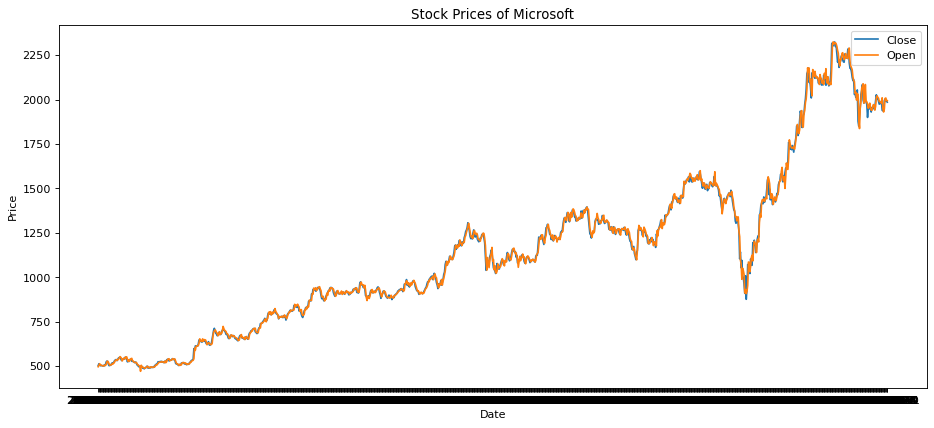

In [32]:
figure(figsize=(14, 6), dpi=80)
plt.plot(fsdata["Close"], label="Close")
plt.plot(fsdata["Open"], label="Open")

plt.legend()
plt.title("Stock Prices of Microsoft")
plt.xlabel("Date")
plt.ylabel("Price")

In [33]:
# Calculating the 3 days rolling mean or moving average 
# (D1+D2+D3/3=RM1, D2+D3+D4 =RM2......)
fsdata.rolling(3).mean().head(10)

Close  Compound  Negative   Neutral  Positive        Open  \
Date                                                                         
2016-08-11         NaN       NaN       NaN       NaN       NaN         NaN   
2016-08-12         NaN       NaN       NaN       NaN       NaN         NaN   
2016-08-16  507.654612 -0.983633  0.138000  0.764333  0.097667  504.418620   
2016-08-17  507.522522 -0.983633  0.134000  0.767333  0.098667  508.075623   
2016-08-18  504.591970 -0.983333  0.135333  0.752333  0.112667  507.910523   
2016-08-19  502.940959 -0.999267  0.138333  0.750667  0.111333  504.897410   
2016-08-22  502.701569 -0.999067  0.133000  0.751000  0.116333  502.899679   
2016-08-23  501.446788 -0.999367  0.137333  0.762333  0.100333  502.239268   
2016-08-24  502.371358 -0.999700  0.141333  0.769000  0.089667  501.199127   
2016-08-25  502.511688 -0.999900  0.146333  0.770333  0.083000  502.718068   

                  High         Low        Volume  
Date                                              
2016-08-11         NaN         NaN           NaN  
2016-08-12         NaN         NaN           NaN  
2016-08-16  513.556997  500.604767  6.753659e+06  
2016-08-17  514.539358  501.859538  6.956275e+06  
2016-08-18  511.361155  501.694438  5.630888e+06  
2016-08-19  507.596832  500.307576  4.832528e+06  
2016-08-22  506.094401  500.307576  3.478436e+06  
2016-08-23  504.666270  498.491455  3.412402e+06  
2016-08-24  504.658010  499.135356  3.495748e+06  
2016-08-25  506.193461  499.432546  4.768951e+06

Text(0, 0.5, 'Price')

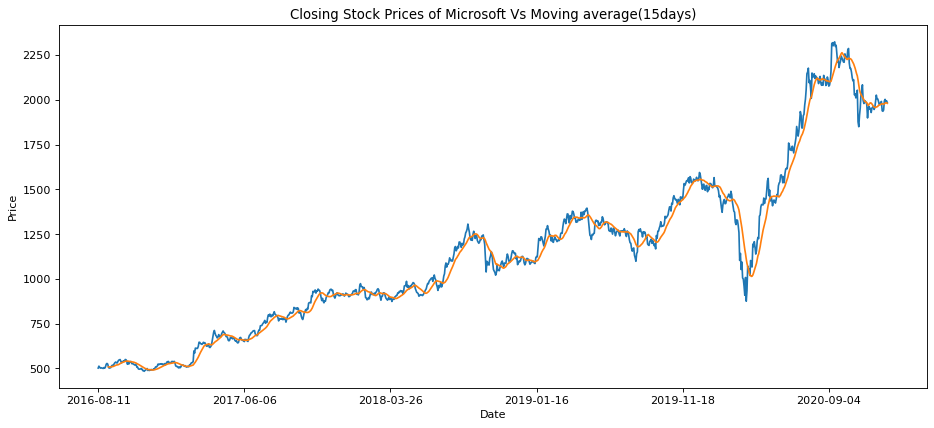

In [34]:
# Creating a visualization on 15 Days moving average
figure(figsize=(14, 6), dpi=80)

fsdata['Close'].plot()
fsdata.rolling(window = 15).mean()['Close'].plot()

# plt.legend()
plt.title("Closing Stock Prices of Microsoft Vs Moving average(15days)")
plt.xlabel("Date")
plt.ylabel("Price")

# Data Preparation for Modelling

In [35]:
fsdata.columns

Index(['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High',
       'Low', 'Volume'],
      dtype='object')

# Scaling the data to manage the sensitivity of LSTM Model. 
# Applying the MinMaxScaler

In [36]:
# Importing Libraries for Data Preprocessing
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [37]:
scale = MinMaxScaler()
scaled_data = scale.fit_transform(np.array(fsdata))

In [38]:
print(scaled_data)

[[9.78356822e-03 5.00100020e-05 6.85039370e-01 ... 7.95321539e-03
  1.86350077e-02 8.12216232e-02]
 [1.56240882e-02 5.00100020e-05 5.19685039e-01 ... 1.32421780e-02
  2.32937674e-02 9.69211699e-02]
 [1.26903628e-02 2.44548910e-02 3.54330709e-01 ... 1.37433873e-02
  2.28921547e-02 7.54887883e-02]
 ...
 [8.18232759e-01 1.00020004e-04 5.03937008e-01 ... 8.09843160e-01
  8.22694689e-01 1.12982068e-01]
 [8.21194261e-01 1.00020004e-04 4.25196850e-01 ... 8.07126963e-01
  8.18910734e-01 1.37516095e-01]
 [8.15651610e-01 2.00040008e-04 4.09448819e-01 ... 8.09630116e-01
  8.20559418e-01 1.14192081e-01]]


# Splitting dataset into train and test split, in time-series analysis it cannot be separated by train-test split method as it is date dependent.

In [39]:
training_size=int(len(scaled_data)*0.70)
test_size=len(scaled_data)-training_size
train_data,test_data= scaled_data[0:training_size,:], scaled_data[training_size:len(scaled_data),:]

In [40]:
training_size,test_size

(756, 325)

In [41]:
train_data.shape,test_data.shape

((756, 9), (325, 9))

In [42]:
train_data

array([[9.78356822e-03, 5.00100020e-05, 6.85039370e-01, ...,
        7.95321539e-03, 1.86350077e-02, 8.12216232e-02],
       [1.56240882e-02, 5.00100020e-05, 5.19685039e-01, ...,
        1.32421780e-02, 2.32937674e-02, 9.69211699e-02],
       [1.26903628e-02, 2.44548910e-02, 3.54330709e-01, ...,
        1.37433873e-02, 2.28921547e-02, 7.54887883e-02],
       ...,
       [3.83415722e-01, 1.00020004e-04, 4.96062992e-01, ...,
        3.73999105e-01, 3.86114369e-01, 2.15484149e-01],
       [3.82043094e-01, 1.50030006e-04, 4.96062992e-01, ...,
        3.78193348e-01, 3.89996711e-01, 1.44321148e-01],
       [3.94908376e-01, 1.45029006e-03, 2.36220472e-01, ...,
        3.86529045e-01, 3.91040888e-01, 1.45689033e-01]])

In [43]:
test_data

array([[3.94746856e-01, 3.05061012e-03, 2.75590551e-01, ...,
        3.88639332e-01, 4.00626150e-01, 6.39095205e-02],
       [4.01314086e-01, 1.00020004e-04, 5.74803150e-01, ...,
        3.92332398e-01, 4.05632975e-01, 6.66260360e-02],
       [3.88368076e-01, 3.50070014e-04, 3.62204724e-01, ...,
        3.92569756e-01, 3.96636778e-01, 6.48537644e-02],
       ...,
       [8.18232759e-01, 1.00020004e-04, 5.03937008e-01, ...,
        8.09843160e-01, 8.22694689e-01, 1.12982068e-01],
       [8.21194261e-01, 1.00020004e-04, 4.25196850e-01, ...,
        8.07126963e-01, 8.18910734e-01, 1.37516095e-01],
       [8.15651610e-01, 2.00040008e-04, 4.09448819e-01, ...,
        8.09630116e-01, 8.20559418e-01, 1.14192081e-01]])

In [44]:
# test_data.columns

# Separating Train and test data features and target.

In [45]:
# scaled_data.columns

In [46]:
# setting the features dataset for prediction  
# cols = ['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High','Low', 'Volume']
X_train = train_data[:,1:]
X_train

array([[5.00100020e-05, 6.85039370e-01, 1.58273381e-01, ...,
        7.95321539e-03, 1.86350077e-02, 8.12216232e-02],
       [5.00100020e-05, 5.19685039e-01, 3.66906475e-01, ...,
        1.32421780e-02, 2.32937674e-02, 9.69211699e-02],
       [2.44548910e-02, 3.54330709e-01, 2.58992806e-01, ...,
        1.37433873e-02, 2.28921547e-02, 7.54887883e-02],
       ...,
       [1.00020004e-04, 4.96062992e-01, 3.30935252e-01, ...,
        3.73999105e-01, 3.86114369e-01, 2.15484149e-01],
       [1.50030006e-04, 4.96062992e-01, 3.09352518e-01, ...,
        3.78193348e-01, 3.89996711e-01, 1.44321148e-01],
       [1.45029006e-03, 2.36220472e-01, 5.75539568e-01, ...,
        3.86529045e-01, 3.91040888e-01, 1.45689033e-01]])

In [47]:
# setting the target variable as the shifted close_price
y_train = train_data[:,:1]
y_train

array([[0.00978357],
       [0.01562409],
       [0.01269036],
       [0.00956824],
       [0.0108467 ],
       [0.00999889],
       [0.00917798],
       [0.00880116],
       [0.01150612],
       [0.00940675],
       [0.01349782],
       [0.02145114],
       [0.02386002],
       [0.02213749],
       [0.01384771],
       [0.0095817 ],
       [0.01134462],
       [0.01073905],
       [0.01497812],
       [0.01797914],
       [0.01850397],
       [0.01803297],
       [0.02348322],
       [0.02632274],
       [0.02816643],
       [0.0259594 ],
       [0.02543457],
       [0.02992933],
       [0.03365704],
       [0.03484128],
       [0.03572948],
       [0.03038689],
       [0.0254884 ],
       [0.0285163 ],
       [0.03040036],
       [0.03192104],
       [0.03005045],
       [0.03581024],
       [0.03532578],
       [0.03192104],
       [0.02137042],
       [0.02688796],
       [0.02231244],
       [0.02781652],
       [0.02949869],
       [0.02955252],
       [0.0232679 ],
       [0.023

In [48]:
# cols = ['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High','Low', 'Volume']
X_test = test_data[:,1:]
X_test

array([[3.05061012e-03, 2.75590551e-01, 4.53237410e-01, ...,
        3.88639332e-01, 4.00626150e-01, 6.39095205e-02],
       [1.00020004e-04, 5.74803150e-01, 2.66187050e-01, ...,
        3.92332398e-01, 4.05632975e-01, 6.66260360e-02],
       [3.50070014e-04, 3.62204724e-01, 4.82014388e-01, ...,
        3.92569756e-01, 3.96636778e-01, 6.48537644e-02],
       ...,
       [1.00020004e-04, 5.03937008e-01, 3.30935252e-01, ...,
        8.09843160e-01, 8.22694689e-01, 1.12982068e-01],
       [1.00020004e-04, 4.25196850e-01, 4.96402878e-01, ...,
        8.07126963e-01, 8.18910734e-01, 1.37516095e-01],
       [2.00040008e-04, 4.09448819e-01, 3.95683453e-01, ...,
        8.09630116e-01, 8.20559418e-01, 1.14192081e-01]])

In [49]:
# setting the target variable as the shifted close_price
y_test = test_data[:,:1]
y_test

array([[0.39474686],
       [0.40131409],
       [0.38836808],
       [0.39657712],
       [0.38858339],
       [0.38142401],
       [0.385865  ],
       [0.37151937],
       [0.41205313],
       [0.40389796],
       [0.42516066],
       [0.42561823],
       [0.43490385],
       [0.44149801],
       [0.45398652],
       [0.43926405],
       [0.4425746 ],
       [0.44098659],
       [0.44206324],
       [0.44994923],
       [0.47040453],
       [0.46494082],
       [0.46784766],
       [0.47115821],
       [0.47557221],
       [0.48857208],
       [0.49925733],
       [0.49807302],
       [0.48636505],
       [0.5100771 ],
       [0.50725098],
       [0.52654897],
       [0.53303548],
       [0.52509555],
       [0.52108526],
       [0.52148896],
       [0.51591759],
       [0.5092427 ],
       [0.52200039],
       [0.51494866],
       [0.50542079],
       [0.52937502],
       [0.52423428],
       [0.52859448],
       [0.52232336],
       [0.54953428],
       [0.56993572],
       [0.564

In [50]:

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (756, 8) and y: (756, 1)
Number of rows and columns in the Test set X: (325, 8) and y: (325, 1)


# Reshape input to be [samples, time steps, features] which is required for LSTM

In [51]:
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)
print('Shape of Training set y:', y_train.shape)
print('Shape of Test set y:', y_test.shape)

Shape of Training set X: (756, 8, 1)
Shape of Test set X: (325, 8, 1)
Shape of Training set y: (756, 1)
Shape of Test set y: (325, 1)


In [52]:
# Importing Libraries for Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation


In [53]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2000)
cols = ['Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High','Low', 'Volume']
len(cols)


8

In [54]:
# Setting model architecture and compiling it
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(len(cols),1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [55]:
# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.35, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
16/16 [==============================] - 2s 116ms/step - loss: 0.0134 - val_loss: 0.0616
Epoch 2/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0095 - val_loss: 0.0431
Epoch 3/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0090 - val_loss: 0.0601
Epoch 4/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0083 - val_loss: 0.0478
Epoch 5/100
16/16 [==============================] - 0s 15ms/step - loss: 0.0078 - val_loss: 0.0434
Epoch 6/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0069 - val_loss: 0.0341
Epoch 7/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0055 - val_loss: 0.0200
Epoch 8/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0041 - val_loss: 0.0119
Epoch 9/100
16/16 [==============================] - 0s 15ms/step - loss: 0.0026 - val_loss: 0.0051
Epoch 10/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0015 - val_loss: 0.002

16/16 [==============================] - 0s 14ms/step - loss: 1.9594e-04 - val_loss: 5.1540e-04
Epoch 79/100
16/16 [==============================] - 0s 13ms/step - loss: 1.3210e-04 - val_loss: 2.7259e-04
Epoch 80/100
16/16 [==============================] - 0s 13ms/step - loss: 1.1608e-04 - val_loss: 4.9346e-04
Epoch 81/100
16/16 [==============================] - 0s 13ms/step - loss: 1.5043e-04 - val_loss: 4.6987e-04
Epoch 82/100
16/16 [==============================] - 0s 13ms/step - loss: 1.6699e-04 - val_loss: 2.6047e-04
Epoch 83/100
16/16 [==============================] - 0s 13ms/step - loss: 1.1944e-04 - val_loss: 4.0703e-04
Epoch 84/100
16/16 [==============================] - 0s 13ms/step - loss: 1.0780e-04 - val_loss: 2.3480e-04
Epoch 85/100
16/16 [==============================] - 0s 13ms/step - loss: 9.9837e-05 - val_loss: 2.4921e-04
Epoch 86/100
16/16 [==============================] - 0s 13ms/step - loss: 9.7848e-05 - val_loss: 2.5796e-04
Epoch 87/100
16/16 [============

In [56]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [57]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [58]:
##Transformback to original form
train_predict=scale.inverse_transform(np.array(train_predict).reshape((len(train_predict),1)))
test_predict=scale.inverse_transform(np.array(test_predict).reshape((len(test_predict),1)))


ValueError: non-broadcastable output operand with shape (756,1) doesn't match the broadcast shape (756,9)

In [ ]:
# printing the predictions
print('Train Predictions:')
train_predict[0:5]
print('Test Predictions:')
test_predict[0:5]